In [49]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
rpi = pd.read_csv("..\\data\\rpi_data.csv")

In [66]:
rpi.iloc[365:]

,Title,RPI All Items: Percentage change over 12 months: Jan 1987=100
365,1948 JUN,9.7
366,1948 JUL,7.2
367,1948 AUG,7.9
368,1948 SEP,7.6
369,1948 OCT,7.0
...,...,...
1223,2019 DEC,2.2
1224,2020 JAN,2.7
1225,2020 FEB,2.5
1226,2020 MAR,2.6


In [113]:
labels = list(data['Year'])[::-1]
labels = labels[0::40]

C:\Users\LukeVassor\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\LukeVassor\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


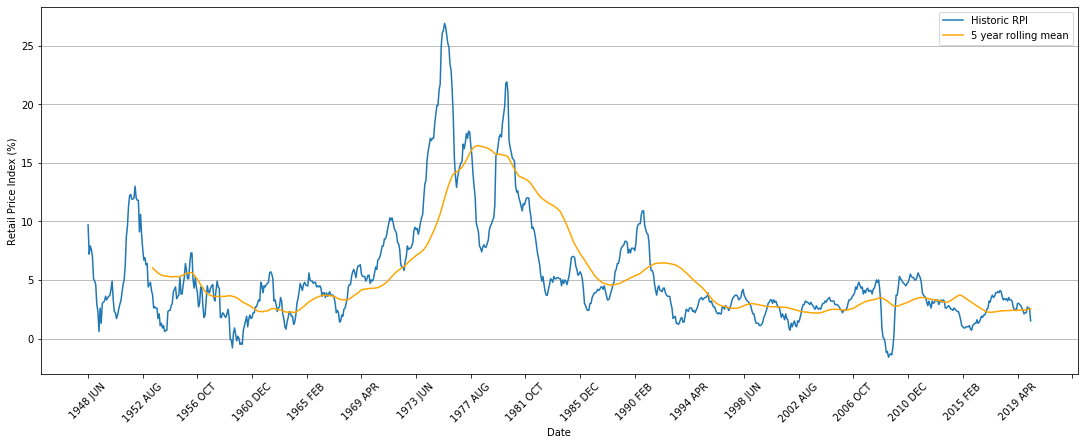

In [126]:
data = rpi.iloc[365:]
data.columns = ["Year", "Value"]
data["Values"] = pd.to_numeric(data["Value"])
data['new_col'] = data['Values'].rolling(60).mean()
# data['Year'] = pd.to_datetime(data['Year'].apply(lambda x: x[:4]))
# data = data[]


fig = plt.figure(figsize=(16,6))
ax = fig.add_axes([0.1,0.15,0.9,0.85])
# ax.set_xticklabels(labels, rotation=45)
plt.xticks(rotation=45)
plt.grid(axis='y')
ax.xaxis.set_major_locator(plt.MaxNLocator(19))

ax.plot(data['Year'], data['Values'], label="Historic RPI")
ax.plot(data['Year'], data['new_col'], color='orange', label="5 year rolling mean")
ax.set_ylabel("Retail Price Index (%)")
ax.set_xlabel("Date")
plt.legend(loc="best");

fig.savefig(os.path.join('..','results','historic_rpi2.png'), dpi=600)